In [29]:
# load data
import pandas as pd
import datetime

from requests import request
request=request(url='https://raw.githubusercontent.com/ToBeHH/hamburg_corona_zahlen/main/data.json', method='get')
data = request.json()

KEY_AGE = 'Verteilung der Infizierten nach Alter und Geschlecht'

timestamp,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12 = [],[],[],[],[],[],[],[],[],[],[],[],[]
used_times = []
i = 0
for key in data.keys():
    # get calendar week from key 
    y = int(key[0:4])
    d = datetime.date(y, int(key[4:6]), int(key[6:8]))
    w = d.isocalendar()[1]
    used_times_key = "%d-%d" % (y,w)
    if KEY_AGE in data[key] and 'bis 5 Jahre' in data[key][KEY_AGE] and not used_times_key in used_times:
        timestamp.append(used_times_key)
        if i == 0:
            r1.append(data[key][KEY_AGE]['bis 5 Jahre']['männlich']+data[key][KEY_AGE]['bis 5 Jahre']['weiblich'])
            r2.append(data[key][KEY_AGE]['6 bis 14 Jahre']['männlich']+data[key][KEY_AGE]['6 bis 14 Jahre']['weiblich'])
            r3.append(data[key][KEY_AGE]['15 bis 19 Jahre']['männlich']+data[key][KEY_AGE]['15 bis 19 Jahre']['weiblich'])
            r4.append(data[key][KEY_AGE]['20 bis 29 Jahre']['männlich']+data[key][KEY_AGE]['20 bis 29 Jahre']['weiblich'])
            r5.append(data[key][KEY_AGE]['30 bis 39 Jahre']['männlich']+data[key][KEY_AGE]['30 bis 39 Jahre']['weiblich'])
            r6.append(data[key][KEY_AGE]['40 bis 49 Jahre']['männlich']+data[key][KEY_AGE]['40 bis 49 Jahre']['weiblich'])
            r7.append(data[key][KEY_AGE]['50 bis 59 Jahre']['männlich']+data[key][KEY_AGE]['50 bis 59 Jahre']['weiblich'])
            r8.append(data[key][KEY_AGE]['60 bis 69 Jahre']['männlich']+data[key][KEY_AGE]['60 bis 69 Jahre']['weiblich'])
            r9.append(data[key][KEY_AGE]['70 bis 79 Jahre']['männlich']+data[key][KEY_AGE]['70 bis 79 Jahre']['weiblich'])
            r10.append(data[key][KEY_AGE]['80 bis 89 Jahre']['männlich']+data[key][KEY_AGE]['80 bis 89 Jahre']['weiblich'])
            r11.append(data[key][KEY_AGE]['über 90 Jahre']['männlich']+data[key][KEY_AGE]['über 90 Jahre']['weiblich'])
            r12.append(data[key][KEY_AGE]['unbekannt'])
        else:
            # only store deltas
            r1.append(data[key][KEY_AGE]['bis 5 Jahre']['männlich']+data[key][KEY_AGE]['bis 5 Jahre']['weiblich']-sum(r1))
            r2.append(data[key][KEY_AGE]['6 bis 14 Jahre']['männlich']+data[key][KEY_AGE]['6 bis 14 Jahre']['weiblich']-sum(r2))
            r3.append(data[key][KEY_AGE]['15 bis 19 Jahre']['männlich']+data[key][KEY_AGE]['15 bis 19 Jahre']['weiblich']-sum(r3))
            r4.append(data[key][KEY_AGE]['20 bis 29 Jahre']['männlich']+data[key][KEY_AGE]['20 bis 29 Jahre']['weiblich']-sum(r4))
            r5.append(data[key][KEY_AGE]['30 bis 39 Jahre']['männlich']+data[key][KEY_AGE]['30 bis 39 Jahre']['weiblich']-sum(r5))
            r6.append(data[key][KEY_AGE]['40 bis 49 Jahre']['männlich']+data[key][KEY_AGE]['40 bis 49 Jahre']['weiblich']-sum(r6))
            r7.append(data[key][KEY_AGE]['50 bis 59 Jahre']['männlich']+data[key][KEY_AGE]['50 bis 59 Jahre']['weiblich']-sum(r7))
            r8.append(data[key][KEY_AGE]['60 bis 69 Jahre']['männlich']+data[key][KEY_AGE]['60 bis 69 Jahre']['weiblich']-sum(r8))
            r9.append(data[key][KEY_AGE]['70 bis 79 Jahre']['männlich']+data[key][KEY_AGE]['70 bis 79 Jahre']['weiblich']-sum(r9))
            r10.append(data[key][KEY_AGE]['80 bis 89 Jahre']['männlich']+data[key][KEY_AGE]['80 bis 89 Jahre']['weiblich']-sum(r10))
            r11.append(data[key][KEY_AGE]['über 90 Jahre']['männlich']+data[key][KEY_AGE]['über 90 Jahre']['weiblich']-sum(r11))
            r12.append(data[key][KEY_AGE]['unbekannt']-sum(r12))
        i = i + 1
        used_times.append(used_times_key)
df = pd.DataFrame([timestamp,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12]).T
df.columns = ['Zeit','bis 5 Jahre','6 bis 14 Jahre','15 bis 19 Jahre','20 bis 29 Jahre','30 bis 39 Jahre','40 bis 49 Jahre','50 bis 59 Jahre','60 bis 69 Jahre','70 bis 79 Jahre','80 bis 89 Jahre','über 90 Jahre','unbekannt']
df = df.set_index('Zeit')
df = df.astype('int32')
df = df.T
df

Zeit,2020-42,2020-43,2020-44,2020-45,2020-46,2020-47,2020-48,2020-49,2020-50,2020-51,...,2021-12,2021-13,2021-14,2021-15,2021-16,2021-17,2021-18,2021-19,2021-20,2021-21
bis 5 Jahre,142,0,17,32,49,93,66,58,46,60,...,87,307,218,0,238,0,88,90,95,78
6 bis 14 Jahre,432,0,55,102,145,233,233,213,141,155,...,113,442,287,0,567,0,229,190,165,203
15 bis 19 Jahre,494,0,62,118,156,262,259,174,116,137,...,103,313,182,0,397,0,162,130,111,113
20 bis 29 Jahre,1937,0,262,472,592,628,535,405,326,376,...,314,896,480,0,995,0,365,376,280,335
30 bis 39 Jahre,1627,0,171,359,457,594,500,422,352,370,...,336,982,554,0,981,0,395,353,323,295
40 bis 49 Jahre,1293,0,137,278,351,464,444,387,288,300,...,255,729,416,0,786,0,324,268,214,225
50 bis 59 Jahre,1312,0,132,218,323,392,374,341,249,305,...,240,675,368,0,672,0,312,239,206,201
60 bis 69 Jahre,653,0,44,126,153,175,185,153,118,160,...,120,386,178,0,368,0,167,128,112,120
70 bis 79 Jahre,502,0,36,56,88,128,126,107,85,140,...,74,199,101,0,156,0,80,70,44,38
80 bis 89 Jahre,434,0,32,44,77,110,130,122,142,144,...,37,103,41,0,66,0,41,20,19,21


<AxesSubplot:xlabel='Zeit'>

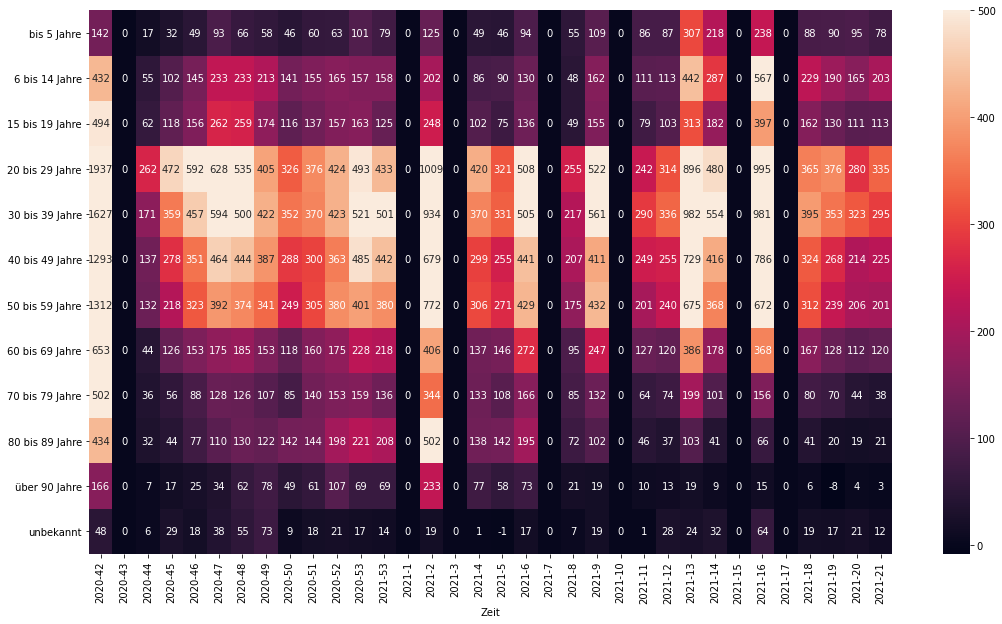

In [36]:
# Increase plot size
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(18, 10))

# Plot graph
import seaborn as sns;
sns.heatmap(df, vmax=500, annot=True, fmt=".0f")

In [32]:
# numbers based on https://www.statistik-nord.de/fileadmin/Dokumente/Statistische_Berichte/bevoelkerung/A_I_3_j_H/A_I_3_j19_HH.pdf
# https://www.statistik-nord.de/zahlen-fakten/bevoelkerung/bevoelkerungspyramide#/Schleswig-Holstein/0/0
# and moved by 2 years

population = [
    124000.0, # bis 5 Jahre
    149000.0, # 6 bis 14 Jahre
     79000.0, # 15 bis 19 Jahre
    251000.0, # 20 bis 29 Jahre
    307000.0, # 30 bis 39 Jahre
    248000.0, # 40 bis 49 Jahre
    271000.0, # 50 bis 59 Jahre
    184000.0, # 60 bis 69 Jahre
    143000.0, # 70 bis 79 Jahre
     95000.0, # 80 bis 89 Jahre
     17000.0  # über 90 Jahre
]

df_pop = df
df_pop = df_pop.drop(['unbekannt'])
df_pop = df_pop.astype('float64')

for y in range(len(population)):
    for x in range(len(list(df_pop.columns))):
        df_pop.iat[y,x] = df_pop.iat[y,x] / population[y] * 100000.0

df_pop

Zeit,2020-42,2020-43,2020-44,2020-45,2020-46,2020-47,2020-48,2020-49,2020-50,2020-51,...,2021-12,2021-13,2021-14,2021-15,2021-16,2021-17,2021-18,2021-19,2021-20,2021-21
bis 5 Jahre,114.516129,0.0,13.709677,25.806452,39.516129,75.000000,53.225806,46.774194,37.096774,48.387097,...,70.161290,247.580645,175.806452,0.0,191.935484,0.0,70.967742,72.580645,76.612903,62.903226
6 bis 14 Jahre,289.932886,0.0,36.912752,68.456376,97.315436,156.375839,156.375839,142.953020,94.630872,104.026846,...,75.838926,296.644295,192.617450,0.0,380.536913,0.0,153.691275,127.516779,110.738255,136.241611
15 bis 19 Jahre,625.316456,0.0,78.481013,149.367089,197.468354,331.645570,327.848101,220.253165,146.835443,173.417722,...,130.379747,396.202532,230.379747,0.0,502.531646,0.0,205.063291,164.556962,140.506329,143.037975
20 bis 29 Jahre,771.713147,0.0,104.382470,188.047809,235.856574,250.199203,213.147410,161.354582,129.880478,149.800797,...,125.099602,356.972112,191.235060,0.0,396.414343,0.0,145.418327,149.800797,111.553785,133.466135
30 bis 39 Jahre,529.967427,0.0,55.700326,116.938111,148.859935,193.485342,162.866450,137.459283,114.657980,120.521173,...,109.446254,319.869707,180.456026,0.0,319.543974,0.0,128.664495,114.983713,105.211726,96.091205
40 bis 49 Jahre,521.370968,0.0,55.241935,112.096774,141.532258,187.096774,179.032258,156.048387,116.129032,120.967742,...,102.822581,293.951613,167.741935,0.0,316.935484,0.0,130.645161,108.064516,86.290323,90.725806
50 bis 59 Jahre,484.132841,0.0,48.708487,80.442804,119.188192,144.649446,138.007380,125.830258,91.881919,112.546125,...,88.560886,249.077491,135.793358,0.0,247.970480,0.0,115.129151,88.191882,76.014760,74.169742
60 bis 69 Jahre,354.891304,0.0,23.913043,68.478261,83.152174,95.108696,100.543478,83.152174,64.130435,86.956522,...,65.217391,209.782609,96.739130,0.0,200.000000,0.0,90.760870,69.565217,60.869565,65.217391
70 bis 79 Jahre,351.048951,0.0,25.174825,39.160839,61.538462,89.510490,88.111888,74.825175,59.440559,97.902098,...,51.748252,139.160839,70.629371,0.0,109.090909,0.0,55.944056,48.951049,30.769231,26.573427
80 bis 89 Jahre,456.842105,0.0,33.684211,46.315789,81.052632,115.789474,136.842105,128.421053,149.473684,151.578947,...,38.947368,108.421053,43.157895,0.0,69.473684,0.0,43.157895,21.052632,20.000000,22.105263


<AxesSubplot:xlabel='Zeit'>

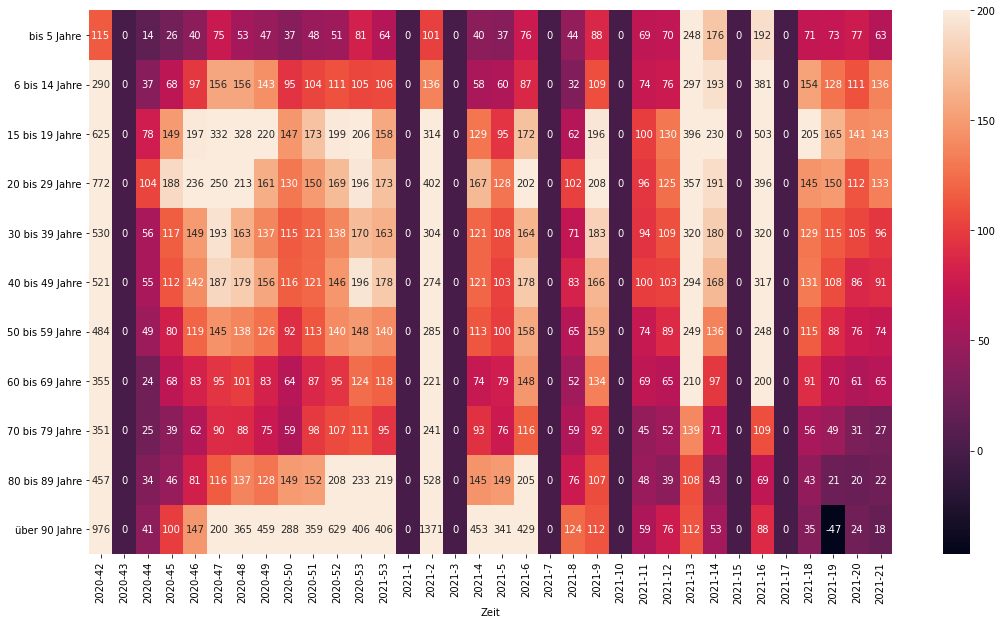

In [38]:
fig=plt.figure(figsize=(18, 10))
sns.heatmap(df_pop, vmax=200, annot=True, fmt=".0f")